In [37]:
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("./clean_dataset.csv")
df.to_parquet("./tidy_dataset.parquet")

In [7]:
df

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,iddx_1,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,3D: white,20.244422,16.261975,...,0.000000,2.036195,2.637780,0.590476,85,-182.703552,613.493652,-42.427948,Benign,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,3D: white,31.712570,25.364740,...,0.000000,0.853227,3.912844,0.285714,55,-0.078308,1575.687000,57.174500,Benign,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,3D: XP,22.575830,17.128170,...,0.000000,1.743651,1.950777,0.361905,105,123.649700,1472.010000,232.908900,Benign,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,3D: XP,14.242329,12.164757,...,0.664690,1.258541,1.573733,0.209581,130,-141.024780,1442.185791,58.359802,Benign,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,3D: white,24.725520,20.057470,...,0.000000,2.085409,2.480509,0.313433,20,-72.315640,1488.720000,21.428960,Benign,70.442510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401054,ISIC_9999937,0,IP_1140263,70.0,male,anterior torso,6.80,3D: XP,22.574335,14.944666,...,2.328066,7.054819,2.169398,0.288920,100,147.187256,1182.317505,122.652588,Benign,99.999988
401055,ISIC_9999951,0,IP_5678181,60.0,male,posterior torso,3.11,3D: white,19.977640,16.026870,...,1.048147,1.879502,2.910780,0.460000,25,52.349740,1393.187000,127.261700,Benign,99.999820
401056,ISIC_9999960,0,IP_0076153,65.0,female,anterior torso,2.05,3D: XP,17.332567,12.364397,...,0.607554,1.702824,2.205272,0.183099,40,54.622246,1065.263672,-106.833740,Benign,99.999416
401057,ISIC_9999964,0,IP_5231513,30.0,female,anterior torso,2.80,3D: XP,22.288570,9.564721,...,1.078204,3.680175,1.957157,0.161850,140,-9.861557,877.527000,-76.982120,Benign,100.000000


# Análises SQL

## Quantas pintas um paciente sem cancer geralmente tem?

In [13]:
query = """
    SELECT MEDIAN(contagem) AS media_por_paciente
    FROM (
        SELECT COUNT(isic_id) AS contagem
        FROM 'tidy_dataset.parquet'
        WHERE target = 0
        GROUP BY patient_id
    )

"""

df1 = duckdb.query(query).df()
df1

,media_por_paciente
0,241.0


## Quantas pintas um paciente com cancer geralmente tem?

In [16]:
query = """
    SELECT MEDIAN(contagem) AS media_por_paciente
    FROM (
        SELECT COUNT(isic_id) AS contagem
        FROM 'tidy_dataset.parquet'
        WHERE target = 1
        GROUP BY patient_id
    )

"""

df2 = duckdb.query(query).df()
df2

,media_por_paciente
0,1.0


## Em que lugar lesões cancerígenas geralmente se concentram?

In [19]:
query = """
    SELECT anatom_site_general, COUNT(isic_id) AS contagem
        FROM 'tidy_dataset.parquet'
        WHERE target = 1
        GROUP BY anatom_site_general


"""

df3 = duckdb.query(query).df()
df3

,anatom_site_general,contagem
0,anterior torso,82
1,upper extremity,57
2,posterior torso,103
3,lower extremity,73
4,head/neck,78


## Idade em que

In [28]:
query = """
    WITH aux AS
    (
    SELECT patient_id
    FROM 'tidy_dataset.parquet'
    WHERE target = 1
    )


    SELECT age_approx, COUNT(patient_id) AS contagem
        FROM 'tidy_dataset.parquet'
        WHERE patient_id IN (SELECT patient_id FROM aux)
            AND target = 1
        GROUP BY age_approx;


"""

df3 = duckdb.query(query).df()
df3.sort_values("contagem", ascending=False)

,age_approx,contagem
0,60.0,89
12,65.0,67
9,70.0,49
7,55.0,46
8,50.0,27
5,45.0,27
3,80.0,24
4,75.0,24
10,85.0,15
1,40.0,15


# O sexo impacta em uma pessoa ter câncer de pele?

In [29]:
query = """
    WITH aux AS
    (
    SELECT patient_id
    FROM 'tidy_dataset.parquet'
    WHERE target = 1
    )


    SELECT sex, COUNT(patient_id) AS contagem
        FROM 'tidy_dataset.parquet'
        WHERE patient_id IN (SELECT patient_id FROM aux)
            AND target = 1
        GROUP BY sex;


"""

df4 = duckdb.query(query).df()
df4.sort_values("contagem", ascending=False)

,sex,contagem
0,male,284
1,female,109


# Criação de análises da relação entre sexo e parte do corpo

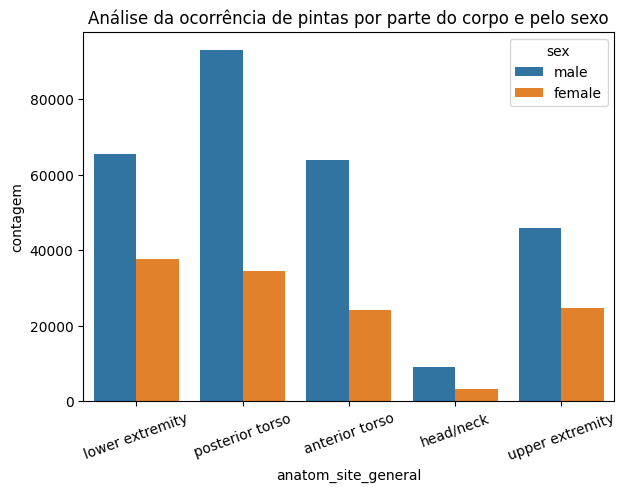

In [46]:
query = """
    SELECT sex,anatom_site_general,  COUNT(patient_id) AS contagem
        FROM 'tidy_dataset.parquet'
        
        GROUP BY sex, anatom_site_general;


"""

df5 = duckdb.query(query).df()
df5.sort_values(["contagem", "sex"], ascending=False)

sns.barplot(
    data=df5,
    x = "anatom_site_general",
    y="contagem",
    hue="sex"
)
plt.xticks(rotation=20)
plt.tight_layout()
plt.title("Análise da ocorrência de pintas por parte do corpo e pelo sexo")
plt.show()